📦 Library Versions:
NumPy: 2.0.2
Pandas: 2.2.2
XGBoost: 3.1.1

✅ Environment setup complete!

📊 Loading California Housing Dataset...
✅ Dataset loaded successfully!
Shape: (20640, 9)

🔍 First 10 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.9

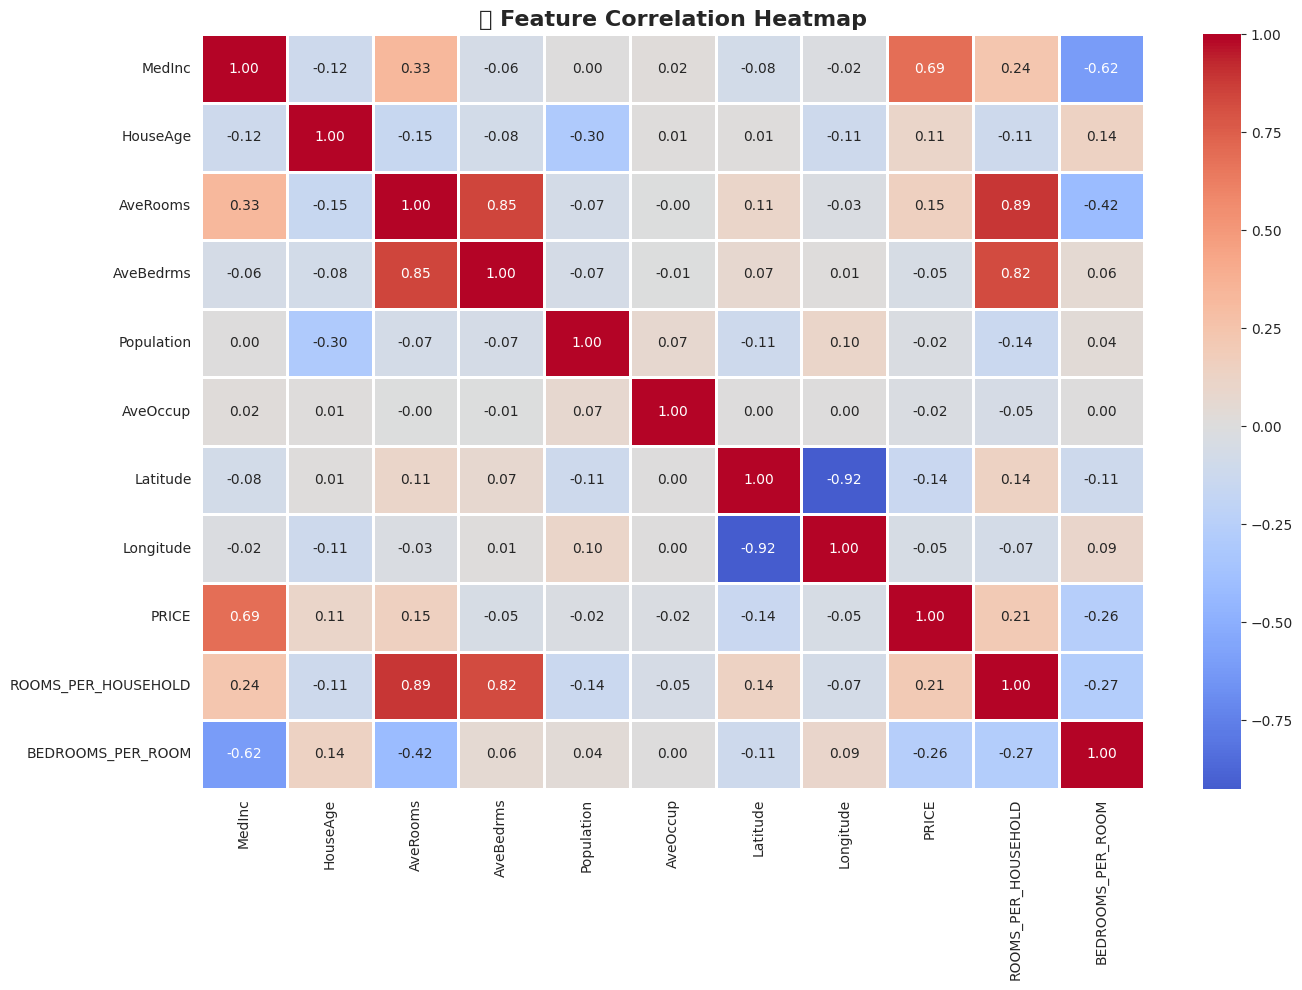

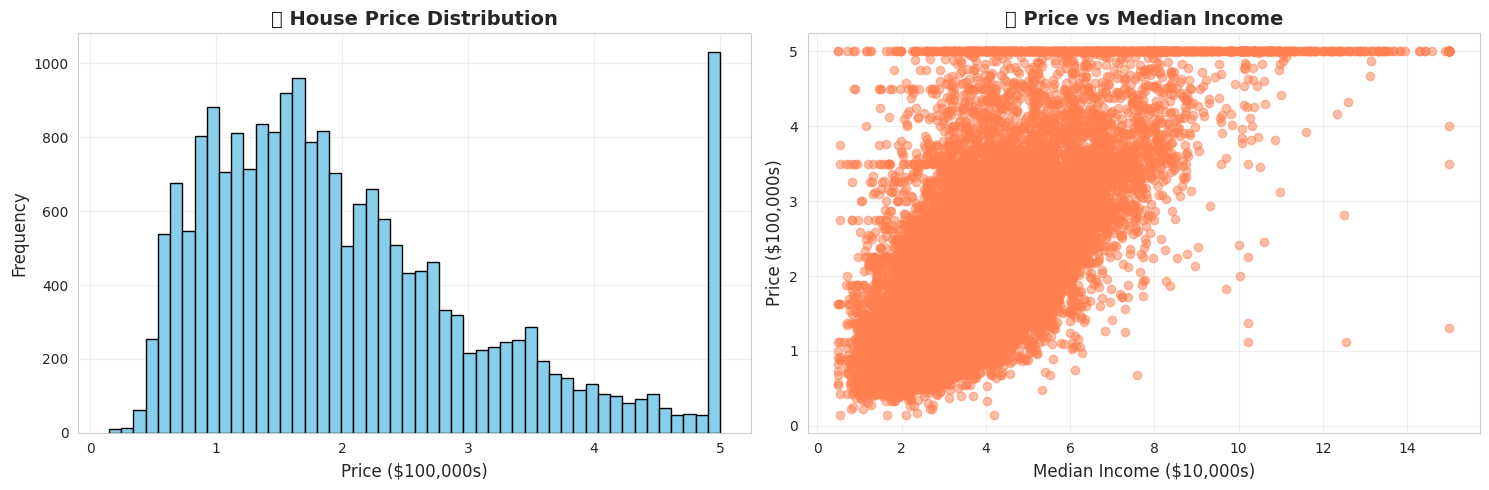

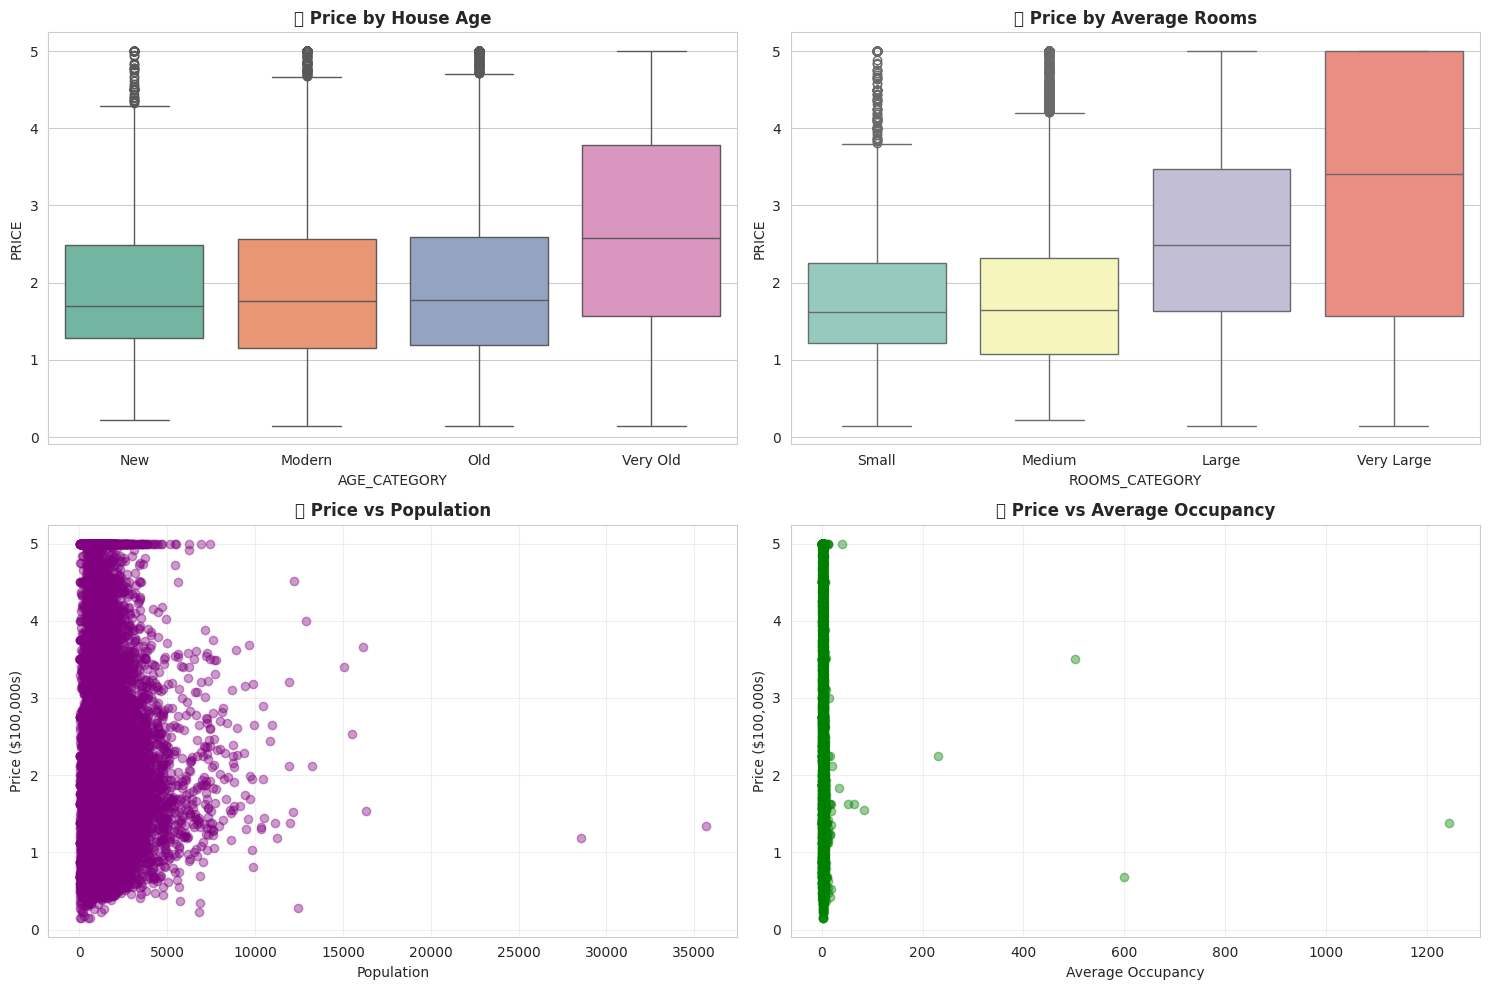

✅ EDA complete!

🤖 Building and Training Models...

1️⃣ Training Linear Regression...
   ✅ Linear Regression trained!
2️⃣ Training Decision Tree Regressor...
   ✅ Decision Tree trained!
3️⃣ Training Random Forest Regressor...
   ✅ Random Forest trained!
4️⃣ Training XGBoost Regressor...
   ✅ XGBoost trained!

✅ All models trained successfully!

📊 Evaluating Models...

🤖 Linear Regression
   Mean Absolute Error (MAE): $48616.44
   Mean Squared Error (MSE): 0.4561
   Root Mean Squared Error (RMSE): $67534.72
   R² Score: 0.6519
--------------------------------------------------------------------------------
🤖 Decision Tree
   Mean Absolute Error (MAE): $43433.22
   Mean Squared Error (MSE): 0.4178
   Root Mean Squared Error (RMSE): $64640.26
   R² Score: 0.6811
--------------------------------------------------------------------------------
🤖 Random Forest
   Mean Absolute Error (MAE): $33353.59
   Mean Squared Error (MSE): 0.2602
   Root Mean Squared Error (RMSE): $51005.31
   R² Score:

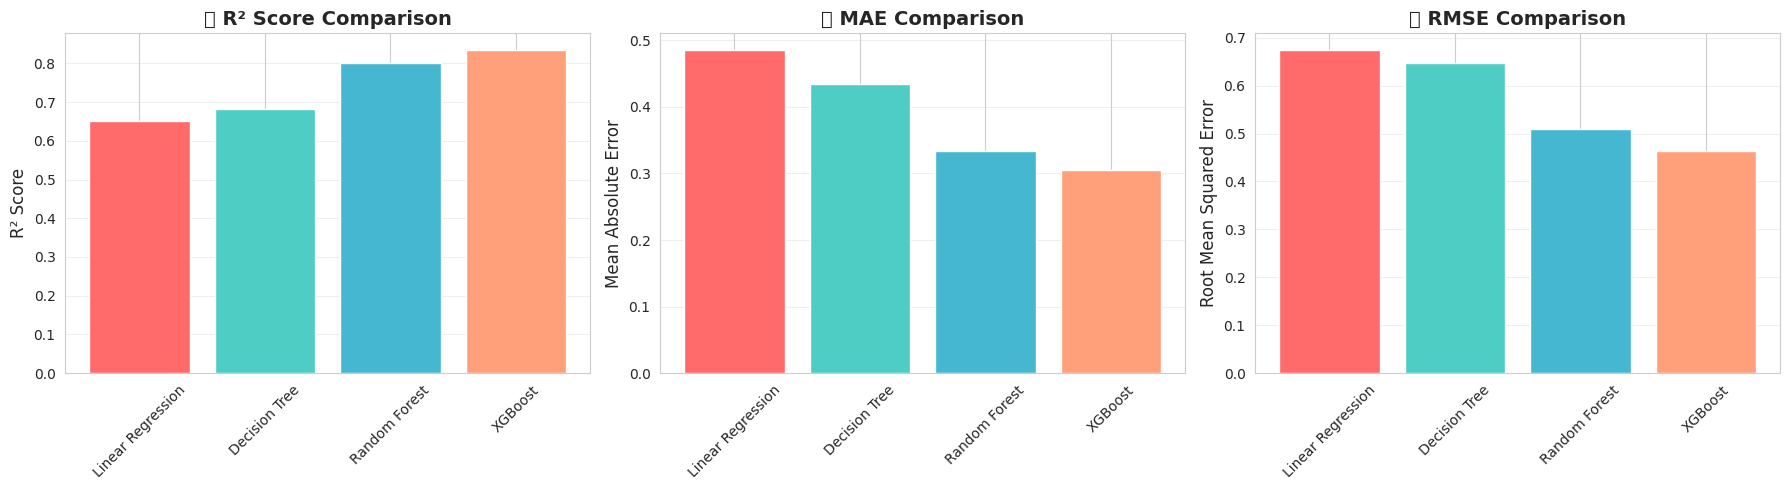


🏆 Best Model: XGBoost (R² Score: 0.8359)


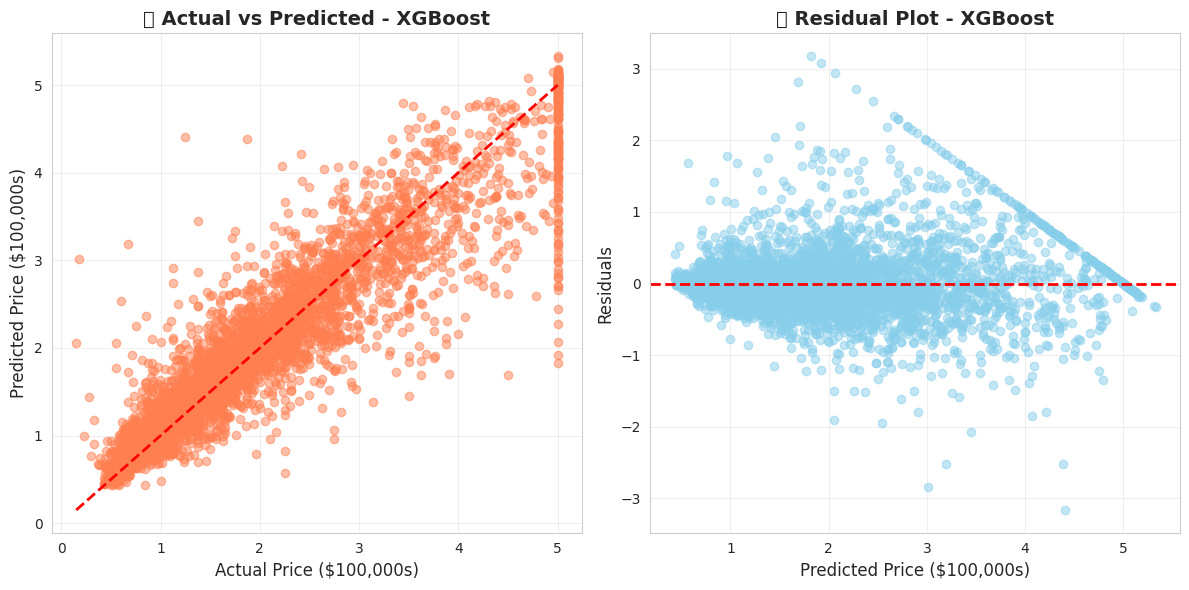

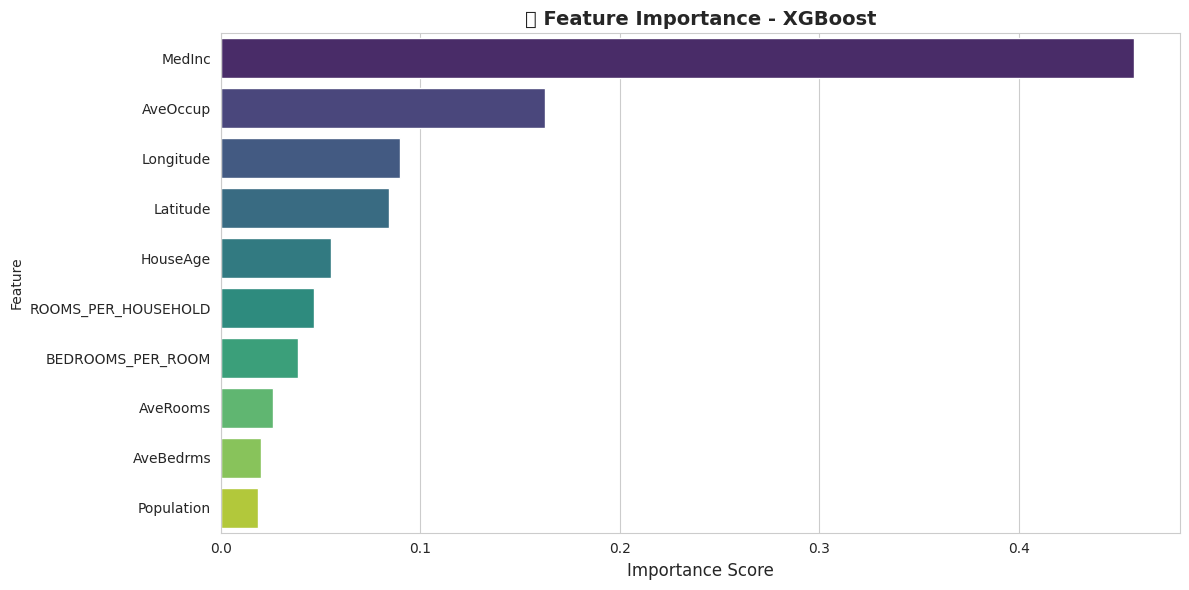


📊 Top 5 Most Important Features:
  Feature  Importance
   MedInc    0.457873
 AveOccup    0.162746
Longitude    0.089623
 Latitude    0.084196
 HouseAge    0.055321


🔮 Making Predictions on New Data...

📝 Please enter the house features to predict the price:

💡 TIP: Press Enter without typing to use the example value shown

1️⃣  INCOME INFORMATION:
   Enter Median Income (in $10,000s) [Example: 8.0]: 7.0
   ✅ Median Income: $70,000/year

2️⃣  PROPERTY AGE:
   Enter House Age (in years) [Example: 35]: 30
   ✅ House Age: 30.0 years

3️⃣  ROOM DETAILS:
   Enter Average Rooms per house [Example: 6.5]: 5.0
   ✅ Average Rooms: 5.0

   Enter Average Bedrooms per house [Example: 1.2]: 2.0
   ✅ Average Bedrooms: 2.0

4️⃣  AREA INFORMATION:
   Enter Block Population [Example: 300]: 200
   ✅ Population: 200 people

   Enter Average Occupancy per house [Example: 2.5]: 3.5
   ✅ Average Occupancy: 3.5 people/house

5️⃣  LOCATION (GPS Coordinates):
   💡 California ranges: Latitude (32.5 to 42.0), L

In [ ]:
# 🏠 House Price Prediction - Complete ML Project
# ================================================
# A comprehensive end-to-end Machine Learning project for predicting house prices
# Author: ML Practitioner | Environment: Google Colab

# ============================================================================
# 1. ENVIRONMENT SETUP
# ============================================================================

# Install required packages
!pip install -q xgboost

# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost # Import xgboost directly
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Print library versions for reproducibility
print("📦 Library Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
# Removed the line that prints scikit-learn version due to persistent error
print(f"XGBoost: {xgboost.__version__}") # Access version from imported xgboost
print("\n✅ Environment setup complete!\n")

# ============================================================================
# 2. DATASET LOADING
# ============================================================================

print("📊 Loading California Housing Dataset...")
california = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target  # Price in $100,000s

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")

# Display first 10 rows
print("🔍 First 10 rows of the dataset:")
print(df.head(10))
print("\n")

# Summary statistics
print("📈 Summary Statistics:")
print(df.describe())
print("\n")

# Missing values check
print("🔍 Missing Values Count:")
print(df.isnull().sum())
print("\n")

# Dataset information
print("ℹ️ Dataset Information:")
print(california.DESCR[:500])

# ============================================================================
# 3. DATA PREPROCESSING
# ============================================================================

print("\n🔧 Starting Data Preprocessing...")

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("⚠️ Missing values detected. Handling...")
    df = df.fillna(df.median())
else:
    print("✅ No missing values found.")

# Feature Engineering: Create additional features
df['ROOMS_PER_HOUSEHOLD'] = df['AveRooms'] / df['AveOccup']
df['BEDROOMS_PER_ROOM'] = df['AveBedrms'] / df['AveRooms']

# Separate features and target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

print(f"\n📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✅ Data split complete:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling complete!")

# ============================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n📊 Performing Exploratory Data Analysis...\n")

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1)
plt.title('🔥 Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Price Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['PRICE'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Price ($100,000s)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('💰 House Price Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# 3. Price vs Median Income (strongest correlation)
axes[1].scatter(df['MedInc'], df['PRICE'], alpha=0.5, color='coral')
axes[1].set_xlabel('Median Income ($10,000s)', fontsize=12)
axes[1].set_ylabel('Price ($100,000s)', fontsize=12)
axes[1].set_title('💵 Price vs Median Income', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Box plots for different features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price by House Age Categories
df['AGE_CATEGORY'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, 50, 100],
                             labels=['New', 'Modern', 'Old', 'Very Old'])
sns.boxplot(data=df, x='AGE_CATEGORY', y='PRICE', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('🏚️ Price by House Age', fontsize=12, fontweight='bold')

# Price by Average Rooms
df['ROOMS_CATEGORY'] = pd.cut(df['AveRooms'], bins=[0, 4, 6, 8, 20],
                               labels=['Small', 'Medium', 'Large', 'Very Large'])
sns.boxplot(data=df, x='ROOMS_CATEGORY', y='PRICE', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('🛏️ Price by Average Rooms', fontsize=12, fontweight='bold')

# Population vs Price
axes[1, 0].scatter(df['Population'], df['PRICE'], alpha=0.4, color='purple')
axes[1, 0].set_xlabel('Population')
axes[1, 0].set_ylabel('Price ($100,000s)')
axes[1, 0].set_title('👥 Price vs Population', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Average Occupancy vs Price
axes[1, 1].scatter(df['AveOccup'], df['PRICE'], alpha=0.4, color='green')
axes[1, 1].set_xlabel('Average Occupancy')
axes[1, 1].set_ylabel('Price ($100,000s)')
axes[1, 1].set_title('🏠 Price vs Average Occupancy', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ EDA complete!\n")

# ============================================================================
# 5. MODEL BUILDING
# ============================================================================

print("🤖 Building and Training Models...\n")

# Dictionary to store models and their results
models = {}
results = {}

# 1. Linear Regression
print("1️⃣ Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr_model
print("   ✅ Linear Regression trained!")

# 2. Decision Tree Regressor
print("2️⃣ Training Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt_model
print("   ✅ Decision Tree trained!")

# 3. Random Forest Regressor
print("3️⃣ Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_model
print("   ✅ Random Forest trained!")

# 4. XGBoost Regressor
print("4️⃣ Training XGBoost Regressor...")
xgb_model = XGBRegressor(n_estimators=100, random_state=42, max_depth=7, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)
models['XGBoost'] = xgb_model
print("   ✅ XGBoost trained!")

print("\n✅ All models trained successfully!\n")

# ============================================================================
# 6. MODEL EVALUATION
# ============================================================================

print("📊 Evaluating Models...\n")
print("="*80)

# Evaluate each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'predictions': y_pred
    }

    # Print results
    print(f"🤖 {name}")
    print(f"   Mean Absolute Error (MAE): ${mae * 100000:.2f}")
    print(f"   Mean Squared Error (MSE): {mse:.4f}")
    print(f"   Root Mean Squared Error (RMSE): ${rmse * 100000:.2f}")
    print(f"   R² Score: {r2:.4f}")
    print("-"*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[m]['MAE'] for m in results.keys()],
    'RMSE': [results[m]['RMSE'] for m in results.keys()],
    'R2 Score': [results[m]['R2'] for m in results.keys()]
})

print("\n📊 Model Comparison Summary:")
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].bar(comparison_df['Model'], comparison_df['R2 Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('📊 R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# MAE comparison
axes[1].bar(comparison_df['Model'], comparison_df['MAE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1].set_ylabel('Mean Absolute Error', fontsize=12)
axes[1].set_title('📊 MAE Comparison', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[2].bar(comparison_df['Model'], comparison_df['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[2].set_ylabel('Root Mean Squared Error', fontsize=12)
axes[2].set_title('📊 RMSE Comparison', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} (R² Score: {results[best_model_name]['R2']:.4f})")

# Actual vs Predicted for best model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, results[best_model_name]['predictions'], alpha=0.5, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($100,000s)', fontsize=12)
plt.ylabel('Predicted Price ($100,000s)', fontsize=12)
plt.title(f'🎯 Actual vs Predicted - {best_model_name}', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Residual plot
residuals = y_test - results[best_model_name]['predictions']
plt.subplot(1, 2, 2)
plt.scatter(results[best_model_name]['predictions'], residuals, alpha=0.5, color='skyblue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price ($100,000s)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title(f'📉 Residual Plot - {best_model_name}', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance (for tree-based models)
if best_model_name in ['Random Forest', 'XGBoost']:
    plt.figure(figsize=(12, 6))
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title(f'🔍 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\n📊 Top 5 Most Important Features:")
    print(feature_importance.head().to_string(index=False))

# ============================================================================
# 7. PREDICTION ON NEW DATA - USER INPUT
# ============================================================================

print("\n\n🔮 Making Predictions on New Data...\n")
print("="*80)
print("📝 Please enter the house features to predict the price:")
print("="*80)

# Function to get user input with validation
def get_float_input(prompt, placeholder, min_val=None, max_val=None):
    """Get validated float input from user"""
    while True:
        try:
            user_input = input(f"{prompt} [Example: {placeholder}]: ").strip()
            if user_input == "":
                print(f"   ℹ️  Using example value: {placeholder}")
                value = float(placeholder)
            else:
                value = float(user_input)

            # Validate range if provided
            if min_val is not None and value < min_val:
                print(f"   ❌ Value must be at least {min_val}. Try again.")
                continue
            if max_val is not None and value > max_val:
                print(f"   ❌ Value must be at most {max_val}. Try again.")
                continue

            return value
        except ValueError:
            print("   ❌ Invalid input! Please enter a valid number.")

print("\n💡 TIP: Press Enter without typing to use the example value shown\n")

# Collect user inputs with helpful placeholders
print("1️⃣  INCOME INFORMATION:")
med_inc = get_float_input(
    "   Enter Median Income (in $10,000s)",
    "8.0",
    min_val=0.5,
    max_val=15.0
)
print(f"   ✅ Median Income: ${med_inc * 10000:,.0f}/year\n")

print("2️⃣  PROPERTY AGE:")
house_age = get_float_input(
    "   Enter House Age (in years)",
    "35",
    min_val=0,
    max_val=100
)
print(f"   ✅ House Age: {house_age} years\n")

print("3️⃣  ROOM DETAILS:")
ave_rooms = get_float_input(
    "   Enter Average Rooms per house",
    "6.5",
    min_val=1,
    max_val=20
)
print(f"   ✅ Average Rooms: {ave_rooms}\n")

ave_bedrms = get_float_input(
    "   Enter Average Bedrooms per house",
    "1.2",
    min_val=0.5,
    max_val=10
)
print(f"   ✅ Average Bedrooms: {ave_bedrms}\n")

print("4️⃣  AREA INFORMATION:")
population = get_float_input(
    "   Enter Block Population",
    "300",
    min_val=1,
    max_val=10000
)
print(f"   ✅ Population: {population:.0f} people\n")

ave_occup = get_float_input(
    "   Enter Average Occupancy per house",
    "2.5",
    min_val=1,
    max_val=15
)
print(f"   ✅ Average Occupancy: {ave_occup} people/house\n")

print("5️⃣  LOCATION (GPS Coordinates):")
print("   💡 California ranges: Latitude (32.5 to 42.0), Longitude (-124.0 to -114.0)")
latitude = get_float_input(
    "   Enter Latitude",
    "37.85",
    min_val=32.0,
    max_val=42.0
)
print(f"   ✅ Latitude: {latitude}\n")

longitude = get_float_input(
    "   Enter Longitude",
    "-122.25",
    min_val=-124.5,
    max_val=-114.0
)
print(f"   ✅ Longitude: {longitude}\n")

print("="*80)
print("🔄 Processing your inputs...\n")

# Engineer additional features
rooms_per_household = ave_rooms / ave_occup
bedrooms_per_room = ave_bedrms / ave_rooms

# Create input dictionary
user_input = {
    'MedInc': [med_inc],
    'HouseAge': [house_age],
    'AveRooms': [ave_rooms],
    'AveBedrms': [ave_bedrms],
    'Population': [population],
    'AveOccup': [ave_occup],
    'Latitude': [latitude],
    'Longitude': [longitude],
    'ROOMS_PER_HOUSEHOLD': [rooms_per_household],
    'BEDROOMS_PER_ROOM': [bedrooms_per_room]
}

# Convert to DataFrame and scale
user_df = pd.DataFrame(user_input)
user_scaled = scaler.transform(user_df)

# Make prediction
predicted_price = best_model.predict(user_scaled)[0]

# Display results
print("="*80)
print("🏡 YOUR HOUSE FEATURES SUMMARY:")
print("="*80)
print(f"💰 Median Income: ${med_inc * 10000:,.0f}/year")
print(f"🏠 House Age: {house_age} years")
print(f"🛏️  Average Rooms: {ave_rooms}")
print(f"🛌 Average Bedrooms: {ave_bedrms}")
print(f"👥 Block Population: {population:.0f}")
print(f"🏘️  Average Occupancy: {ave_occup} people/house")
print(f"📍 Location: ({latitude}, {longitude})")
print(f"📊 Rooms per Household: {rooms_per_household:.2f}")
print(f"📊 Bedrooms per Room: {bedrooms_per_room:.2f}")
print("="*80)

# Display prediction with visual effect
print("\n" + "🎉"*40)
print(f"\n💰 THE PREDICTED HOUSE PRICE IS: ${predicted_price * 100000:,.2f}\n")
print("🎉"*40 + "\n")

# Provide context
price_category = ""
if predicted_price < 1.5:
    price_category = "💵 Budget-Friendly (Below $150,000)"
elif predicted_price < 2.5:
    price_category = "🏘️  Moderate ($150,000 - $250,000)"
elif predicted_price < 3.5:
    price_category = "🏠 Above Average ($250,000 - $350,000)"
else:
    price_category = "💎 Premium (Above $350,000)"

print(f"📊 Price Category: {price_category}")
print(f"🎯 Model Used: {best_model_name}")
print(f"📈 Model Accuracy (R² Score): {results[best_model_name]['R2']:.2%}")
print(f"📉 Average Error (MAE): ±${results[best_model_name]['MAE'] * 100000:,.2f}\n")

# ============================================================================
# 8. MODEL SAVING
# ============================================================================

print("\n\n💾 Saving the Best Model...\n")

# Save the model and scaler
joblib.dump(best_model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"✅ Model saved as 'house_price_model.pkl'")
print(f"✅ Scaler saved as 'scaler.pkl'")

# Demonstrate loading the model
print("\n🔄 Testing model reload...")
loaded_model = joblib.load('house_price_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Test prediction with loaded model
# Need a sample scaled input for this test. Using the first row of X_test_scaled
sample_scaled = X_test_scaled[0].reshape(1, -1)
test_prediction = loaded_model.predict(sample_scaled)[0]
print(f"✅ Loaded model prediction: ${test_prediction * 100000:,.2f}")
print("✅ Model can be successfully loaded and used for predictions!")

# ============================================================================
# 9. KEY INSIGHTS
# ============================================================================

print("\n\n💡 KEY INSIGHTS FROM THE ANALYSIS:")
print("="*80)

insights = [
    "📈 Median Income is the strongest predictor of house prices (correlation: 0.69)",
    "📍 Geographic location (Latitude/Longitude) significantly impacts prices",
    "🏠 Houses with more rooms per household tend to have higher prices",
    "📉 House age shows negative correlation with price in some areas",
    f"🎯 The {best_model_name} model achieved the best performance with R² = {results[best_model_name]['R2']:.4f}",
    "💰 Model can predict prices within ~${:.2f} on average (MAE)".format(results[best_model_name]['MAE'] * 100000),
    "🌊 Coastal properties (based on latitude/longitude patterns) command premium prices",
    "👥 Areas with moderate population density tend to have better price predictions"
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("="*80)

# ============================================================================
# 10. INTERACTIVE PREDICTION FUNCTION
# ============================================================================

print("\n\n🎮 INTERACTIVE PREDICTION FUNCTION")
print("="*80)

def predict_house_price(med_inc, house_age, ave_rooms, ave_bedrms,
                        population, ave_occup, latitude, longitude):
    """
    Predict house price based on input features

    Parameters:
    - med_inc: Median income (in $10,000s)
    - house_age: Age of house in years
    - ave_rooms: Average number of rooms
    - ave_bedrms: Average number of bedrooms
    - population: Block population
    - ave_occup: Average house occupancy
    - latitude: Latitude coordinate
    - longitude: Longitude coordinate

    Returns:
    - Predicted price in USD
    """
    # Engineer features
    rooms_per_household = ave_rooms / ave_occup
    bedrooms_per_room = ave_bedrms / ave_rooms

    # Create input array
    input_data = np.array([[med_inc, house_age, ave_rooms, ave_bedrms,
                           population, ave_occup, latitude, longitude,
                           rooms_per_household, bedrooms_per_room]])

    # Scale input
    input_scaled = loaded_scaler.transform(input_data)

    # Predict
    prediction = loaded_model.predict(input_scaled)[0]

    return prediction * 100000  # Convert to USD

# Example usage
print("\n📝 Example Usage:")
print("predict_house_price(8.0, 35, 6.5, 1.2, 300, 2.5, 37.85, -122.25)")

example_price = predict_house_price(8.0, 35, 6.5, 1.2, 300, 2.5, 37.85, -122.25)
print(f"\n🏡 Predicted Price: ${example_price:,.2f}")

print("\n" + "="*80)
print("✅ PROJECT COMPLETE! 🎉")
print("="*80)
print("\n📚 Summary:")
print("   • Loaded and preprocessed California Housing Dataset")
print("   • Performed comprehensive EDA with visualizations")
print("   • Trained 4 different ML models")
print(f"   • Best model: {best_model_name} (R² = {results[best_model_name]['R2']:.4f})")
print("   • Created prediction function for new data")
print("   • Saved model for future use")
print("\n🚀 You can now use this model to predict house prices!")